<h1 style="text-align: center;">
        Family Income and Expenditure
</h1>
<hr>
<h2 style="text-align: center;">
    Analyst : Maricel Maribojoc and Junnalyn Merillo
</h2>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
fam = pd.read_csv('dataset\\Family Income and Expenditure.csv')

In [3]:
fam

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
fam.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

In [5]:

fam['Region'] = fam['Region'].astype('category')
fam['Main Source of Income'] = fam['Main Source of Income'].astype('category')
fam['Household Head Sex'] = fam['Household Head Sex'].astype('category')
fam['Household Head Marital Status'] = fam['Household Head Marital Status'].astype('category')
fam['Household Head Highest Grade Completed'] = fam['Household Head Highest Grade Completed'].astype('category')
fam['Household Head Job or Business Indicator'] = fam['Household Head Job or Business Indicator'].astype('category')
fam['Household Head Occupation'] = fam['Household Head Occupation'].astype('category')
fam['Household Head Class of Worker'] = fam['Household Head Class of Worker'].astype('category')
fam['Type of Household'] = fam['Type of Household'].astype('category')
fam['Type of Building/House'] = fam['Type of Building/House'].astype('category')
fam['Type of Roof'] = fam['Type of Roof'].astype('category')
fam['Type of Walls'] = fam['Type of Walls'].astype('category')
fam['Tenure Status'] = fam['Tenure Status'].astype('category')
fam['Toilet Facilities'] = fam['Toilet Facilities'].astype('category')
fam['Main Source of Water Supply'] = fam['Main Source of Water Supply'].astype('category')

In [6]:
fam.dtypes

Total Household Income                              int64
Region                                           category
Total Food Expenditure                              int64
Main Source of Income                            category
Agricultural Household indicator                    int64
Bread and Cereals Expenditure                       int64
Total Rice Expenditure                              int64
Meat Expenditure                                    int64
Total Fish and  marine products Expenditure         int64
Fruit Expenditure                                   int64
Vegetables Expenditure                              int64
Restaurant and hotels Expenditure                   int64
Alcoholic Beverages Expenditure                     int64
Tobacco Expenditure                                 int64
Clothing, Footwear and Other Wear Expenditure       int64
Housing and water Expenditure                       int64
Imputed House Rental Value                          int64
Medical Care E

In [7]:
fam.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [8]:
family = fam.dropna()

In [9]:
family = fam.dropna(subset=['Household Head Occupation', 'Household Head Class of Worker', 'Toilet Facilities'])

In [10]:
family.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

<h1>DIAGNOSTIC QUESTIONS</h1>

Correlation: 0.66


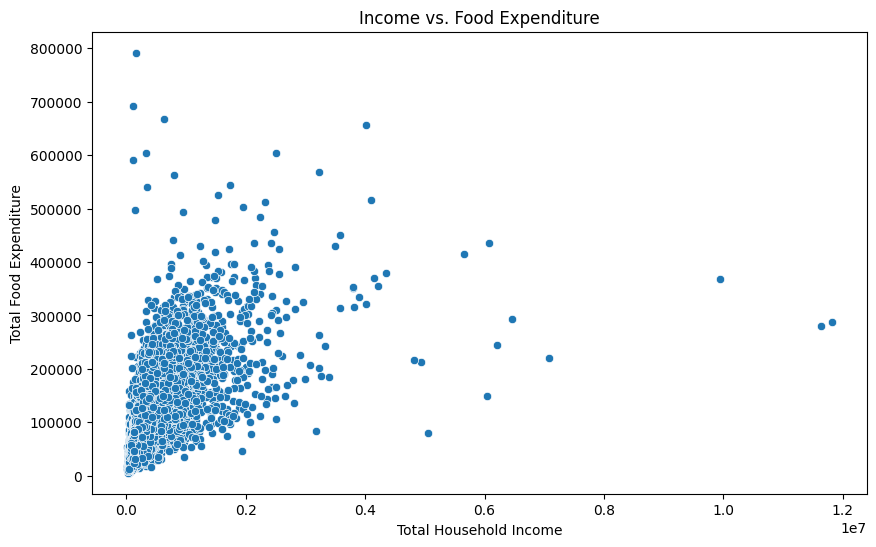

In [11]:
#1. Is there a correlation between total household income and total food expenditure? (DIAGNOSTICS)

correlation = family['Total Household Income'].corr(family['Total Food Expenditure'])
print(f"Correlation: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Household Income', y='Total Food Expenditure', data=family)
plt.title('Income vs. Food Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.show()



<h2>INSIGHT 1</h2>
<h3>The correlation value, approximately 0.66, signifies a positive association between total income and food spending, demonstrating that affluent families tend to allocate greater amounts to food expenses. The scatterplot exhibits a distinct rising trend, with dots aggregating at lower income levels and dispersing at higher ones, underscoring the disparities in economic position.</h3>


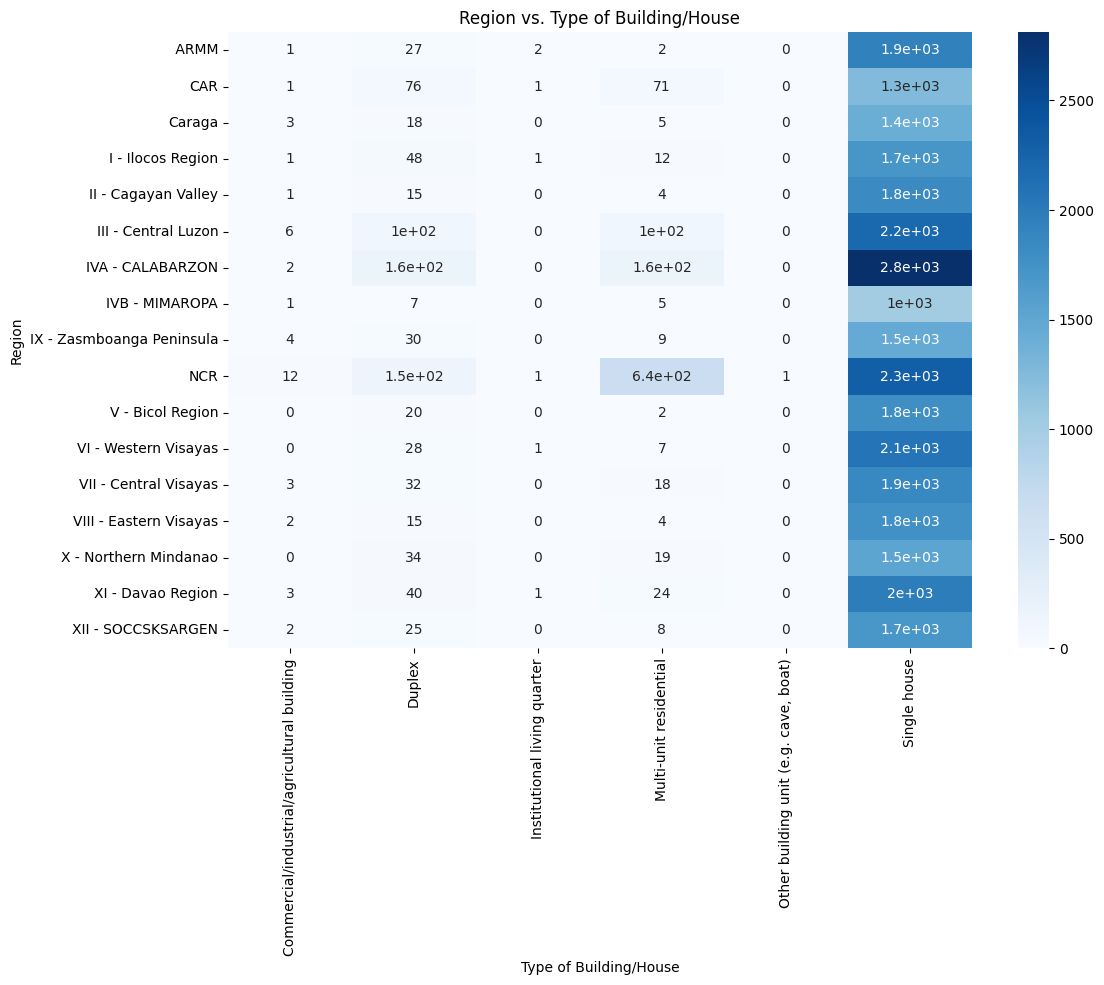

In [12]:
#2. Does region influence the type of building/house? (DIAGNOSTIC)
region_building = pd.crosstab(family['Region'], family['Type of Building/House'])

plt.figure(figsize=(12, 8))
sns.heatmap(region_building, annot=True, cmap='Blues')
plt.title('Region vs. Type of Building/House')
plt.show()

<h2>INSIGHT 2</h2>
<h3>The heatmap illustrates regional preferences in housingg, indicating that urban  areas such as the Nationsl Capital Region exhibit a greater prevalence of modern or multi-unit residential, whereas rural regions in Mindanao and Visayas are characterized by traditionnal types of houses, highlighting socioeconnomic and infrastructural disparities.</h3>

Correlation: 0.03


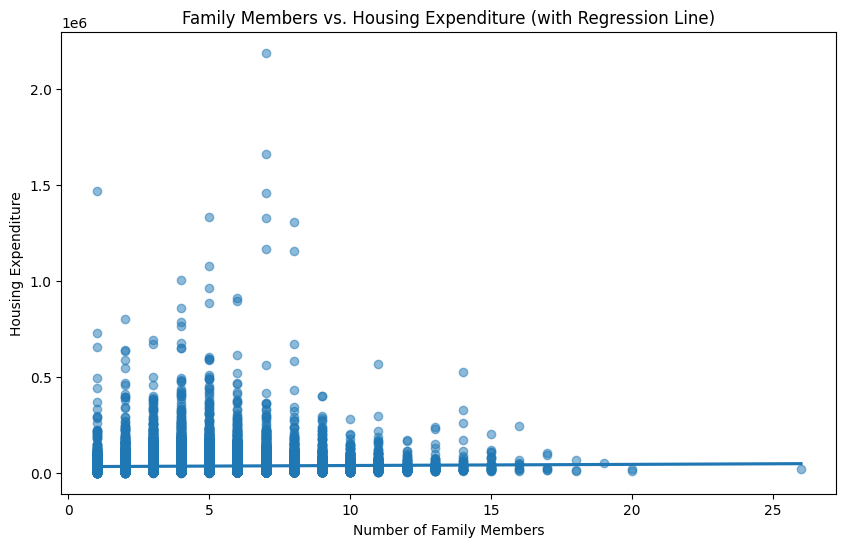

In [13]:
#3. Does the number of family members correlate with housing and water expenditure? (DIAG)


correlation = family['Total Number of Family members'].corr(family['Housing and water Expenditure'])
print(f"Correlation: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.regplot(x='Total Number of Family members', y='Housing and water Expenditure', data=family, scatter_kws={'alpha':0.5})
plt.title('Family Members vs. Housing Expenditure (with Regression Line)')
plt.xlabel('Number of Family Members')
plt.ylabel('Housing Expenditure')
plt.show()


<h2>INSIGHT 3</h2>
<h3>The analysis reveals a weak positive correlation 0.03 between family size and housing expenditure. Indicating thhat family size has minimal impact - housing cost may be more driven bt fixed costs probably rent or mortgage regardless or occupants. </h3>

<h1>DESCRIPTIVE</h1>

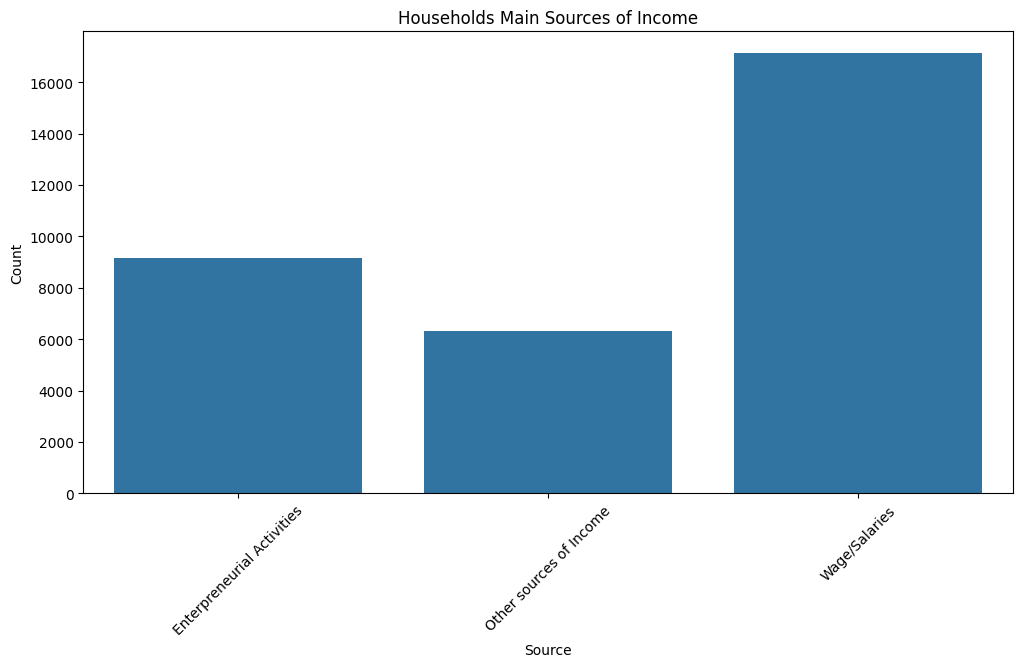

Main Source of Income
Wage/Salaries                 17121
Enterpreneurial Activities     9145
Other sources of Income        6320
Name: count, dtype: int64


In [14]:
#4.What are the most common main sources of income?(DESCRIPTIVE)
    
income_source = family['Main Source of Income'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=income_source.index[:20], y=income_source.values[:20])
plt.title('Households Main Sources of Income')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(income_source)
     

<h2>INSIGHT 4</h2>
<h3>Wage and salary employment is the most common source of income for Filipino households, followed by entreprenurial activites. This distribution shows thar the Philippine household ecomony is primarily wage-dependent providing financial foundation for most families. This income concentration highlights the need for job diversification and entrepreneurship support to improve economic resilience since it implies that economic shocks impacting the employment secotr would have a high effect on household welfare.</h3>

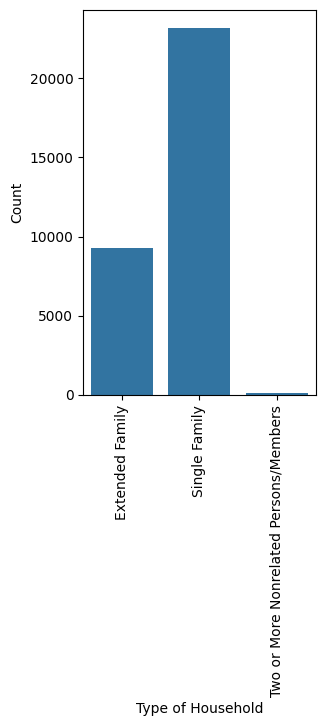

In [15]:

household = 'Type of Household'
f, ax = plt.subplots(figsize=(3, 5))
s = sns.countplot(x=household, data=family)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
s.set(ylabel='Count')
plt.show()

<h2>INSIGHT 5</h2>
<h3>The countplot indicates that single households predominate in the dataset, whereas two or more nonrelated members are less common, illustrating how the family dynamics in the Philippines change due to urbanization.</h3>


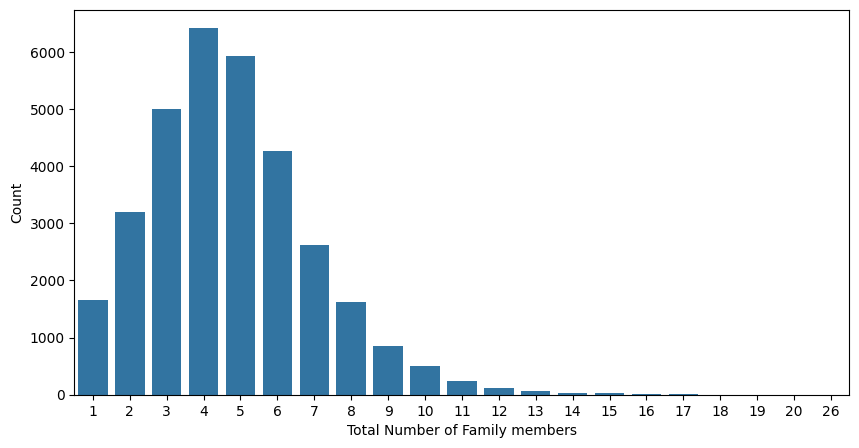

In [16]:
# What is the most common family size in the Philippines, and how does it vary by region? 


num_fam = 'Total Number of Family members'
fig, ax = plt.subplots(figsize=(10,5))
s = sns.countplot(x=num_fam, data=family)
s.set(ylabel='Count')
plt.show()

<h2>INSIGHT 6</h2>
<h3>The counplot illustrates a right-skewed distribution, with the najoriity of households consists of 3-5 individuals, anf a smaller number of larger families with 8 or more individuals, indicative of cultural norms on family size and economic limitations.</h3>


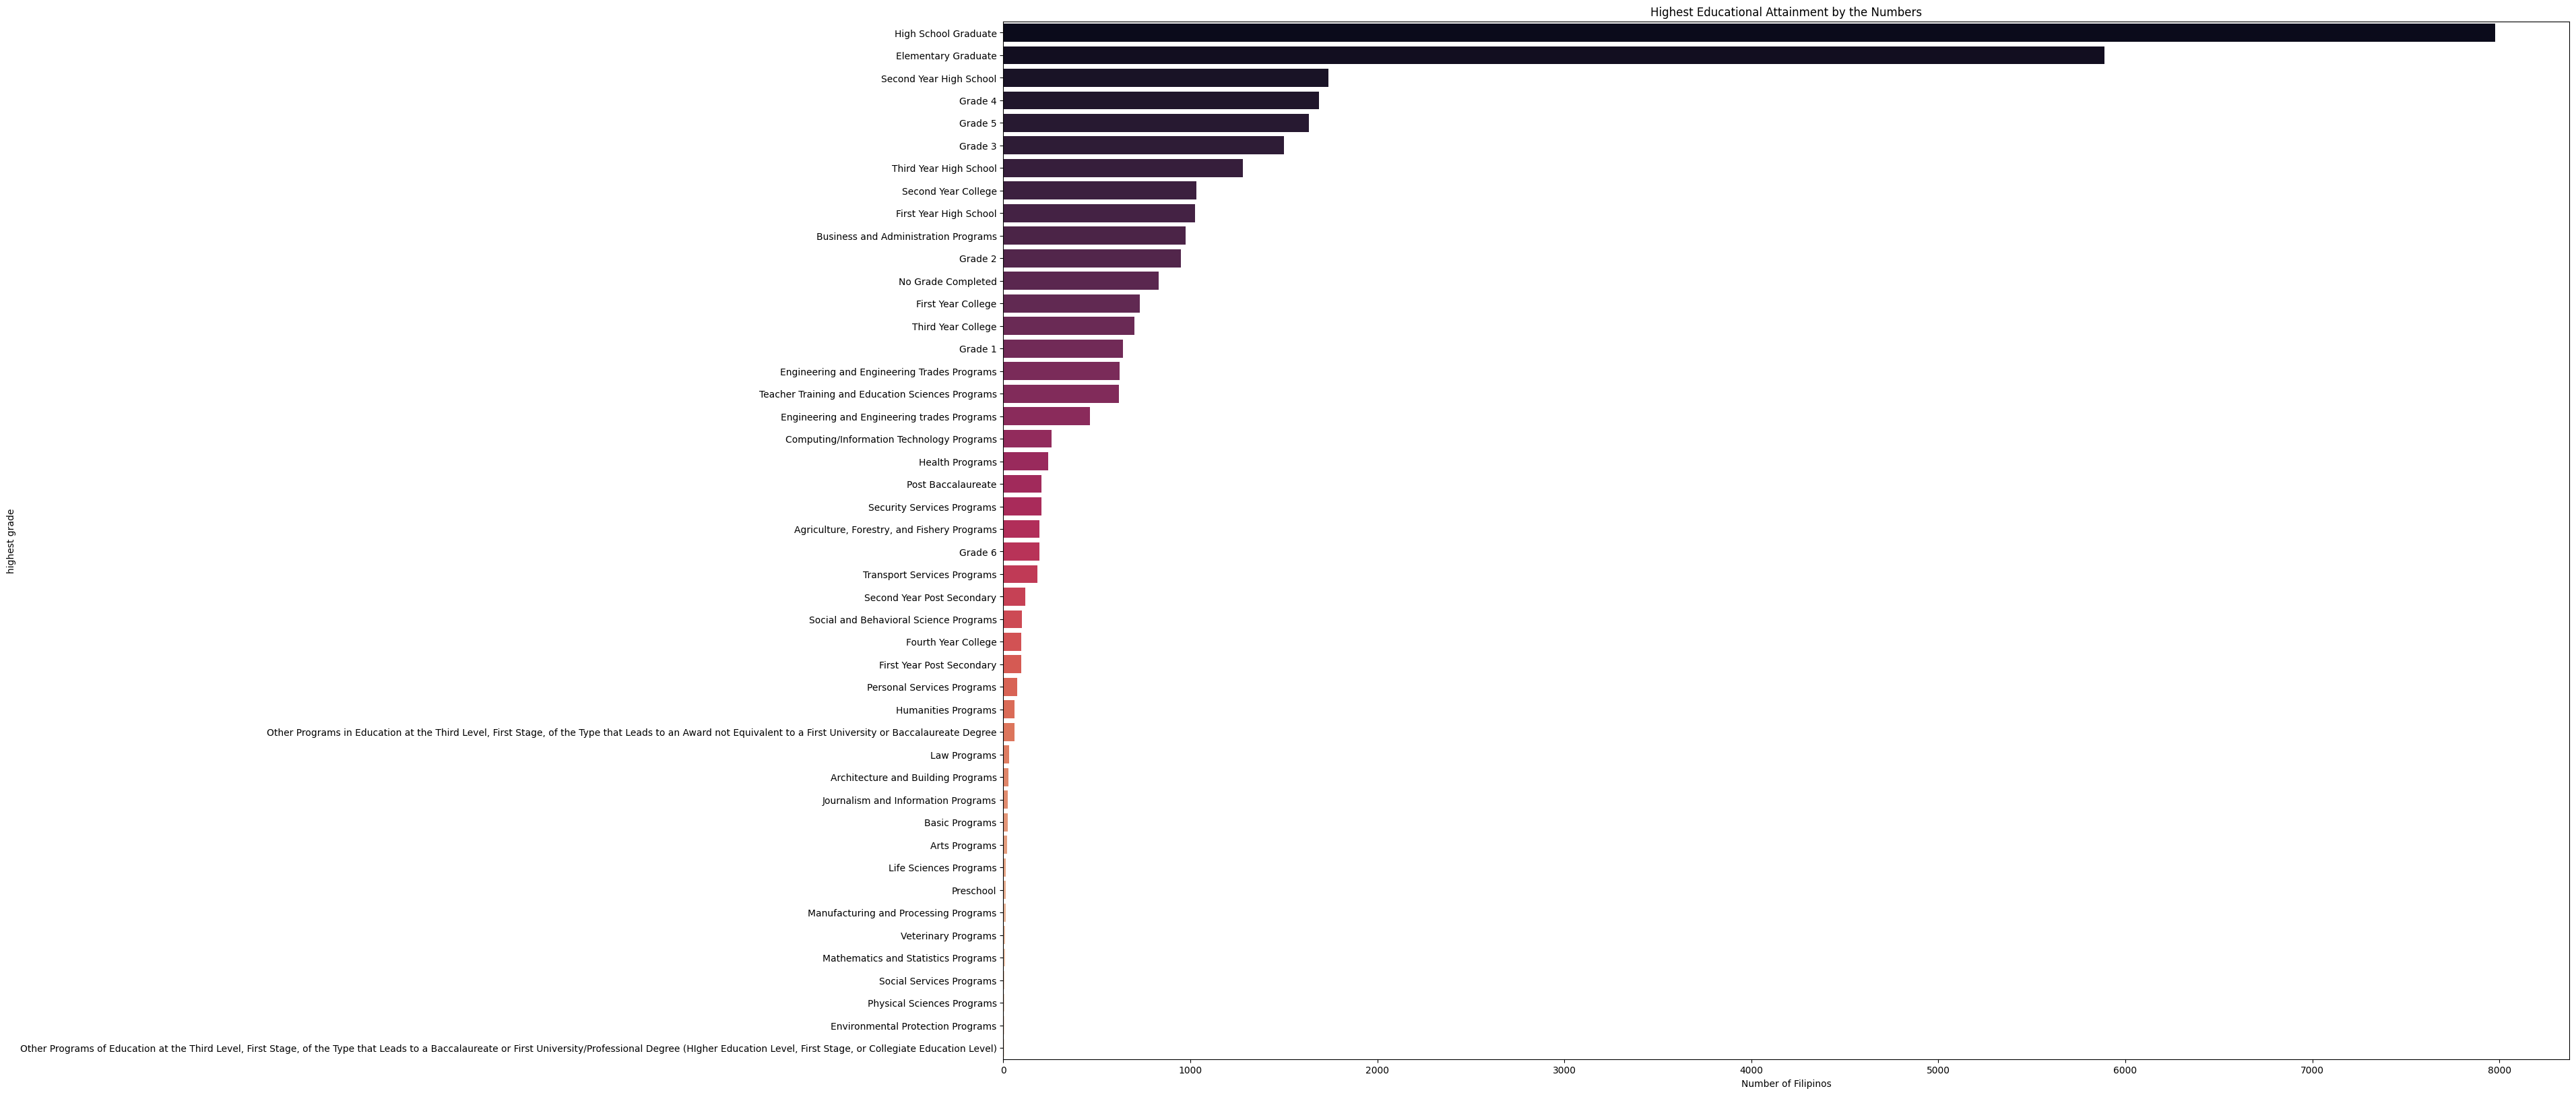

In [17]:
# What factors most influence the educational attainment of household heads in the Philippines, and how does it correlate with income? 

highest_grade = 'Household Head Highest Grade Completed' 
plt.subplots(figsize=(30, 20))
sns.countplot(y=highest_grade, data=family, order=family[highest_grade].value_counts().index, palette='rocket')
plt.xlabel('Number of Filipinos')
plt.ylabel('highest grade')
plt.title("Highest Educational Attainment by the Numbers")
plt.show()

<h2>INSIGHT 7</h2>
<h3>The visualization above shows a distribution skewed towards lower education level, with peaks at elementary or high school completion which is common in the Philippines, and fewer at college or vocational levels, reflecting historicaal access barriers and socioeconimic factors that limits educational attainment. Higher counts for basic education show many family heads stopped schooling early, possibly due to poverty or rural restrictions, which could prolong intergenerational cycles of low income and limited opportunities.</h3>

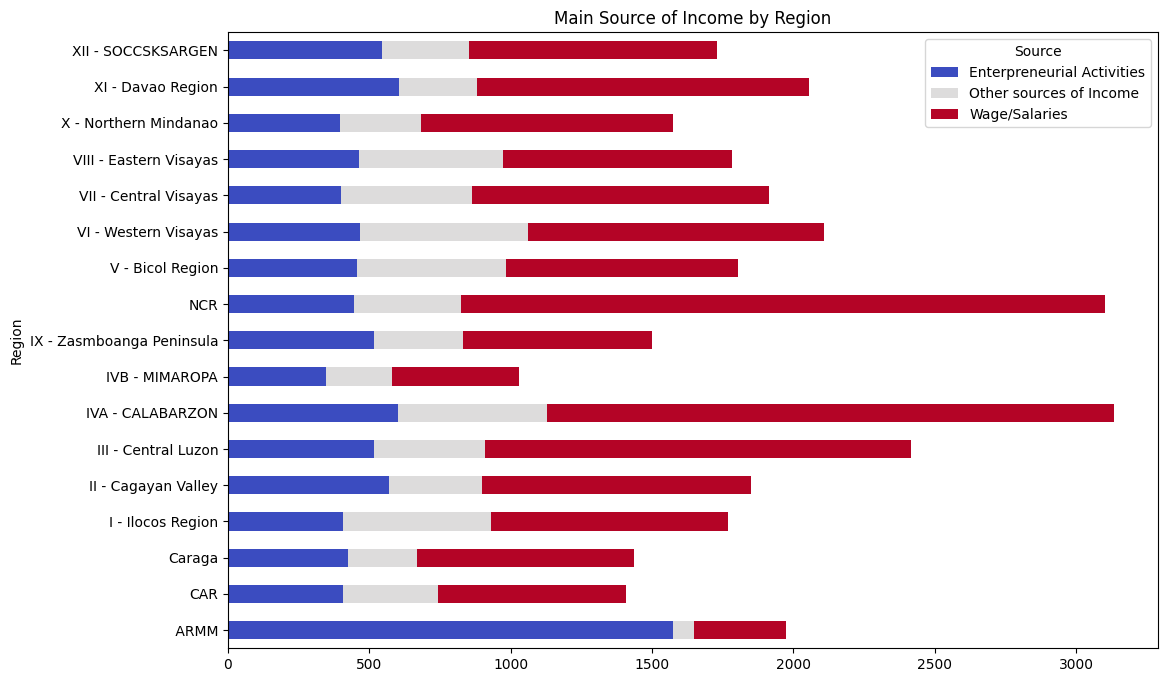

In [18]:
# What is the main Source of Income Across Regions?

source_by_region = family.groupby(['Region', 'Main Source of Income']).size().unstack(fill_value=0)
source_by_region.plot(kind='barh', stacked=True, figsize=(12,8), cmap='coolwarm')
plt.title('Main Source of Income by Region')
plt.legend(title='Source')
plt.show()
# print(source_by_region)

<h2>INSIGHT 8</h2>
<h3>Regional analysis reveals distinct economic profiles across the Philippines, with NCR predominanntly relying on wage and salary employment, while ARMM  regions demonstrate higher concentrations on Entreprenurial activities.  </h3>


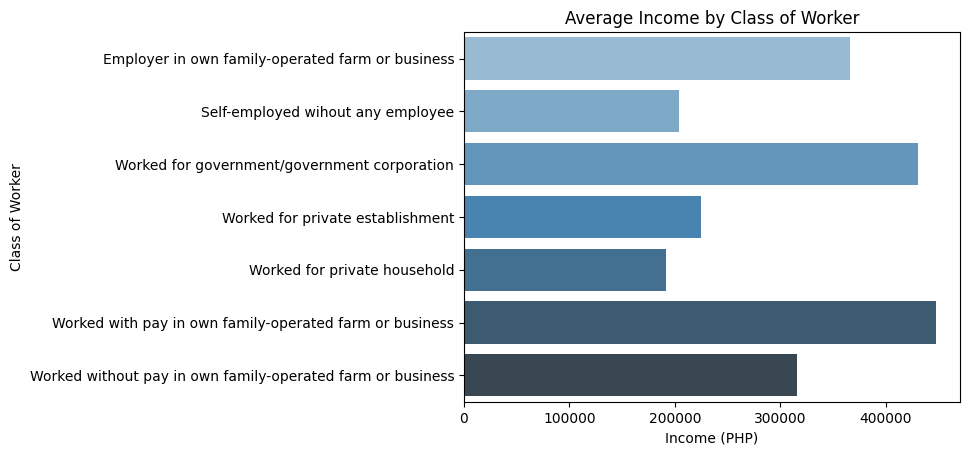

Household Head Class of Worker
Worked for private household                                  192117.42
Self-employed wihout any employee                             204071.23
Worked for private establishment                              225253.00
Worked without pay in own family-operated farm or business    316305.18
Employer in own family-operated farm or business              365890.15
Worked for government/government corporation                  430551.01
Worked with pay in own family-operated farm or business       447975.43
Name: Total Household Income, dtype: float64


In [19]:
# Class of Worker and Income (DESCRIPTIVE)


worker_income = family.groupby('Household Head Class of Worker')['Total Household Income'].mean().sort_values()
worker_income = worker_income.round(2)
sns.barplot(x=worker_income.values, y=worker_income.index, palette='Blues_d')
plt.title('Average Income by Class of Worker')
plt.xlabel('Income (PHP)')
plt.ylabel('Class of Worker')
plt.show()

print(worker_income)

<h2>INSIGHT 9</h2>
<h3> </h3>

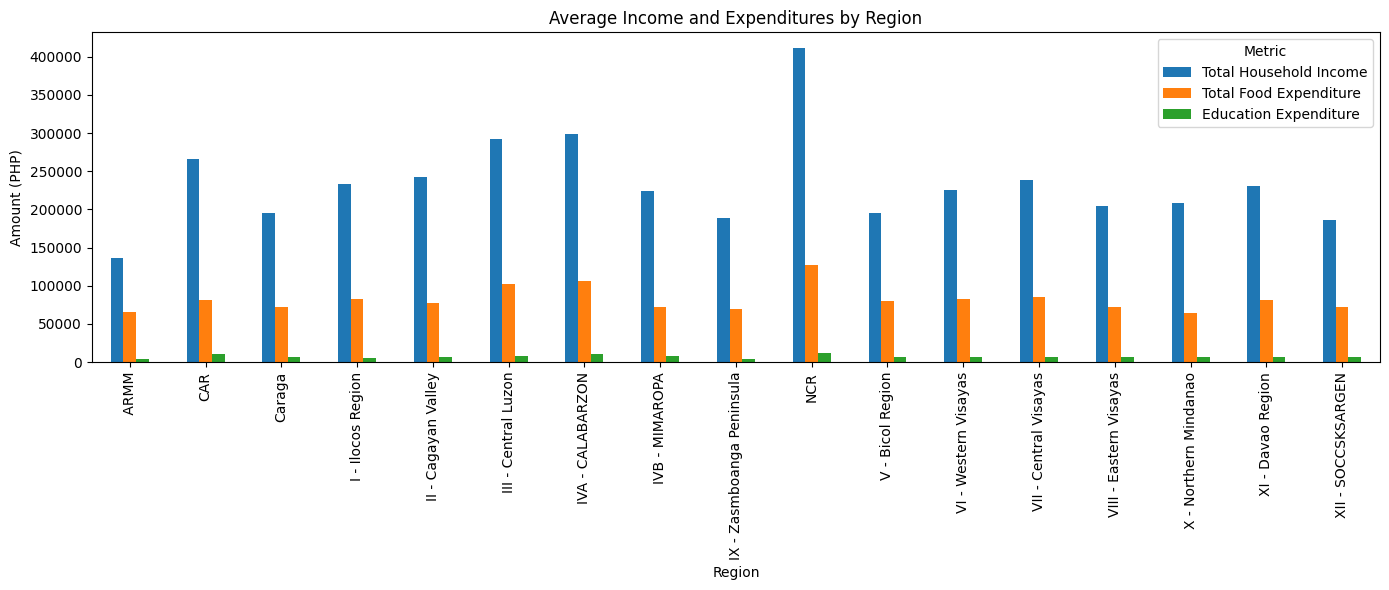

In [20]:
# Average Income and Expenditure by Region (DESCRIPTIVE)

regional_avg = family.groupby('Region')[[
    'Total Household Income',
    'Total Food Expenditure',
    'Education Expenditure'
]].mean()

regional_avg.plot(kind='bar', figsize=(14,6))
regional_avg = regional_avg.round(2)
plt.title('Average Income and Expenditures by Region')
plt.ylabel('Amount (PHP)')
plt.xticks(rotation=90)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

<h2>INSIGHT 10</h2>
<h3>The visualization shown above revelas a significant regional disparities in the Philipppines, with the urban regions like NCR showing higher average household incomes compared to rural areas. When it comes to food expenditure, across regions the average of food expenditure consistently high, which ooften compromise the income in lower-income areas hihlighting food as dominant necessity which strains the budget in poorer provinces. Education expenditure is notably lower in rural areas, showing the limited access to quality schooling as families mainly prioritize their immediate needs.</h3>

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# family_clean = family.dropna()

features = ['Total Household Income', 'Total Number of Family members', 'Region']
target = 'Total Food Expenditure'

# fam = pd.get_dummies(family_clean[features + [target]], drop_first=True)

# X = fam.drop(target, axis=1)
y = fam[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.1%}")


Mean Absolute Error: 20694.39
R-squared: 60.3%


<h2>INSIGHT</h2>
<h3>Total households income appears to be a strong positive driver of total food expenditure, indicating that families with higher earnings consistently spend more on food. Family size also contributes to higher food spending, showing that each additional household member increases the total food budget.

</h3>

